<a href="https://colab.research.google.com/github/MehediAzim/Simulation-and-modeling/blob/master/Single_Server_Queue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [ ]:
class SingleServerQueue:
  def __init__(self,queuePolicy,num_delays):
    # self.interarrivals= [0.4,1.2,0.5,1.7,0.2,1.6,0.2,1.4,1.9,0.7]  
    # self.service_times= [2,0.7,0.2,1.1,3.7,0.6, 0.7, 0.9, 1.2]
    
    self.interarrivals = np.random.exponential(1/3, 120)   #exponential distribution mean 1/3
    self.interarrivals = self.interarrivals.tolist()
    self.service_times = np.random.exponential(1/4, 120)  #exponential distribution mean 1/4
    self.service_times = self.service_times.tolist()
    
    print("Interarrival times: ",self.interarrivals)
    print("Service times: ",self.service_times)

    self.clock= 0.0
    
    self.next_arrival=self.interarrivals.pop(0)
    self.next_departure= float('inf')
    
    self.num_in_queue= 0
    self.times_of_arrivalqueue= []         #store times of arrivals who are waiting in the queue
    self.service_times_in_queue= []   #store service times of waiting customers in the queue
    
    self.queuePolicy = queuePolicy
    self.num_delays = int(num_delays) 

    self.total_delay=0.0
    self.num_of_delays= 0.0
    self.area_under_q= 0.0
    self.area_under_b= 0.0
    
    self.server_status= 0        #0 for IDLE , 1 for BUSY
    self.last_event_time=0.0     #we will need to store last event clock time 

  def start(self):
    while self.num_of_delays < self.num_delays:
      self.timing()
    self.performanceMeasure()

  def timing(self):
    self.clock= min(self.next_arrival,self.next_departure)  #First set clock to minimum time of next event
    self.update_register()
    if self.next_arrival<= self.next_departure:
      self.arrival()
      print("Arrival at Clock:" +str(self.clock))

    else:
      self.departure()
      print("Departure at "+str(self.clock))
    events.append(self.clock)
    
    
    
    print("Server Status:"+str(self.server_status))
    print("Times of arrivals in Queue: "+ str(self.times_of_arrivalqueue))
    print("Service times in Queue: "+str(self.service_times_in_queue))
    print("Number of Delays: "+str(self.num_of_delays))
    print("Total Delay:" +str(self.total_delay))
    print("Next Arrival Time: "+str(self.next_arrival))
    print("Next Departure Time: "+str(self.next_departure))
    print("Area under Q: "+ str(self.area_under_q))
    print("Area under B: "+ str(self.area_under_b))
    print("\n")

  def QueingDiscipline(self):
    # FIFO
    if self.queuePolicy == 'FIFO':
        self.next_departure = self.clock + self.service_times_in_queue.pop(0)
        temp = self.times_of_arrivalqueue.pop(0)
        delay = self.clock - temp
        self.total_delay += delay
            
    # LIFO
    elif self.queuePolicy == 'LIFO':
        self.next_departure = self.clock + self.service_times_in_queue.pop(-1)
        temp = self.times_of_arrivalqueue.pop(-1)
        delay = self.clock - temp
        self.total_delay += delay
                
            
    # SJF
    elif self.queuePolicy == 'SJF':
        index_of_smallest_service_time = self.service_times_in_queue.index( min(self.service_times_in_queue) )               
        self.next_departure = self.clock + self.service_times_in_queue.pop(index_of_smallest_service_time)
        temp = self.times_of_arrivalqueue.pop(index_of_smallest_service_time)
        delay = self.clock - temp
        self.total_delay += delay
                
    # SIRO
    elif self.queuePolicy == 'SIRO':
        index_of_random_service_time =  self.service_times_in_queue.index( np.random.choice(self.service_times_in_queue) )           
        self.next_departure = self.clock + self.service_times_in_queue.pop(index_of_random_service_time)
        temp = self.times_of_arrivalqueue.pop(index_of_random_service_time)
        delay = self.clock - temp
        self.total_delay += delay

  def arrival(self):
    #Schedule next arrival , new_arrival = previous_arrival + inter_arrival time of next customer
    self.next_arrival+= self.interarrivals.pop(0)  
    
    if self.server_status==0:   #server is idle
      self.server_status= 1    #make server BUSY
      delay=0.0            #so delay is zero
      self.total_delay += delay  
      self.num_of_delays +=1   #increase the number of customers delayed

      #schedule next departure, pop the first element of service_times list to get service time of this customer
      self.next_departure = self.clock+ self.service_times.pop(0) 
  
    else:     #Server is BUSY
      #increase queue length, this customer will have to wait in the queue
      self.num_in_queue+=1

      #store the arrival time and service time of this customer in seperate lists
      self.times_of_arrivalqueue.append(self.clock) 
      self.service_times_in_queue.append(self.service_times.pop(0)) 

  def departure(self):
    #check number of customers in the queue
    if self.num_in_queue==0:  #if no customer in the queue
      #make server IDLE 
      self.server_status= 0
      #schedule next departure= infinity
      self.next_departure= float('infinity')
    
    else: 
      #if queue not empty, pop one customer, decrease queue length
      self.num_in_queue-=1
      self.num_of_delays+=1
      #AS FIFO, pop first arrival and service time from the queue. IF LIFO we have to pop last arrival and service time
      #For SJF, finf the index of minimum service time from  service_times_in_queue list.
      #Then pop the arrival of that index from times_of_arrivalqueue for delay count and others.
      self.QueingDiscipline()

  def update_register(self):
    time_differnce= self.clock - self.last_event_time
    self.area_under_q+=self.num_in_queue*time_differnce
    self.area_under_b+=self.server_status*time_differnce
    self.last_event_time=self.clock

    areaUnder_Qt_list.append(self.area_under_q)
    num_in_queue_list.append(self.num_in_queue)

    areaUnder_Bt_list.append(self.area_under_b)
    serverStatus_list.append(self.server_status)

  def performanceMeasure(self):
    print("-----------------------------------------------------------------------Performance Measure [Queue policy : %s]-------------------------------------------------------"%self.queuePolicy)
    print("Average delay: " + str(self.total_delay / self.num_of_delays))
    print("Expected Number of Customers in the queue: " + str(self.area_under_q / self.last_event_time))
    print("Expected Utilization of the server: " + str( self.area_under_b / self.last_event_time))


In [ ]:
areaUnder_Qt_list = []
num_in_queue_list = []
areaUnder_Bt_list = []
serverStatus_list = []
events = []

queuePolicy = input("Enter Queing policy (all caps): ") #LIFO,SIRO,SJF,FIFO
num_delays =  input("Enter number of delays: ") # 10,50,100

SSQ = SingleServerQueue(queuePolicy,num_delays)
SSQ.start()  

Enter Queing policy (all caps): FIFO
Enter number of delays: 10
Interarrival times:  [0.26529150272103663, 0.41864358765527926, 0.30774104860135626, 0.2624003841057569, 0.18368283036516642, 0.34605309831453646, 0.19183973305621327, 0.7411748043442189, 1.1049707273512712, 0.1612007003007511, 0.5229653799897227, 0.25089136984552945, 0.27981094891294095, 0.8660847179751469, 0.02456178497094929, 0.03038700970633349, 0.00680852889474165, 0.5958292265382961, 0.5019280772884052, 0.6801047603151835, 1.281740612722283, 0.5350798529833819, 0.20630981953765617, 0.5055119922933838, 0.04195813727684759, 0.3404772954640243, 0.051576560909215065, 0.9648068165638419, 0.24594242610368622, 0.1785219061002521, 0.10242678436348458, 0.496084946242245, 0.20302747210102834, 0.28011156895587064, 0.00632285722079463, 0.32046030973161976, 0.31566555928125933, 0.3198493242430786, 0.9593050262470078, 0.38171298621679206, 0.1485061642437464, 0.19151080291916103, 0.39870260037779004, 0.020705098641771898, 0.3663041

#Visualization

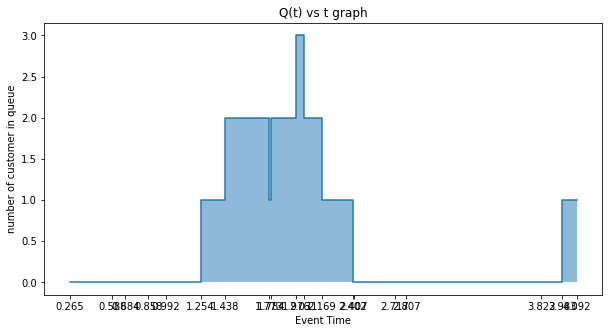

In [ ]:
plt.figure(figsize=(10,5))
plt.fill_between(events,num_in_queue_list, step="pre", alpha=0.5)
plt.step(events, num_in_queue_list)
plt.xticks(events)
plt.xlabel('Event Time') 
plt.ylabel('number of customer in queue') 
plt.title('Q(t) vs t graph') 
plt.show()

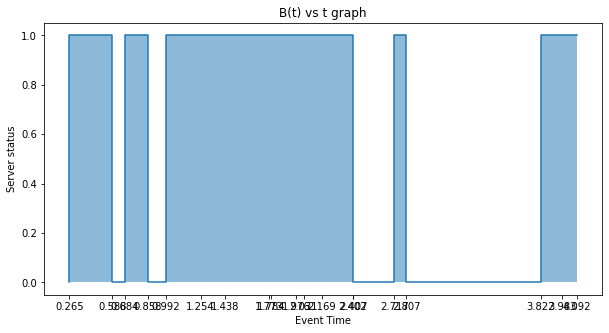

In [ ]:
plt.figure(figsize=(10,5))
plt.fill_between(events,serverStatus_list, step="pre", alpha=0.5)
plt.step(events , serverStatus_list)
plt.xticks(events)
plt.xlabel('Event Time') 
plt.ylabel('Server status') 
plt.title('B(t) vs t graph') 
plt.show()